In [19]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

C:\Users\user 1\AppData\Local\Temp\ipykernel_4600\3700766821.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


In [20]:
import pandas as pd
import numpy as np
import os
import glob

In [21]:
## 提取有效数据
# 源文件夹路径
""" # dorm
source_folder = 'F:\Dateset\SEU_dataset\gearbox\gearset' 
csv_files = glob.glob(os.path.join(source_folder, '*_20_0.csv')) # 返回的是地址！！
# 目标文件夹路径
destination_folder = 'F:\python_learning\Calculation-method-exercises\pretreatment_HD\SEU_ed' #注意更改路径 """

# workroom
source_folder = 'E:\Data\SEU_Dataset\gearbox\gearset'
csv_files = glob.glob(os.path.join(source_folder, '*_20_0.csv')) # 返回的是地址！！
# 目标文件夹路径
destination_folder = 'E:\git_respo\Calculation-method-exercises\pretreatment_HD\SEU_ed' #注意更改路径

    

In [23]:
# 确保目标文件夹存在
os.makedirs(destination_folder, exist_ok=True)

# 遍历源文件夹中的每个文件
for file_path in csv_files:
    
    # 读取文件内容（假设是csv格式）
    data = pd.read_csv(file_path, header=None, low_memory=False, sep='\t')
    
    # 在这里添加你的数据处理代码
    columns = ('motor_vibration', 'x_planetary_gearbox', 'y_planetary gearbox', 'z_planetary gearbox',
            'motor_torque', 'x_parallel_gearbox', 'y_parallel_gearbox', 'z_parallel_gearbox')
    Data = data.iloc[16:, :-1]
    Data.columns = columns
    
    # 获取源文件的文件名
    filename = os.path.basename(file_path)
    
    # 为输出文件生成路径
    output_file_path = os.path.join(destination_folder, filename)
    
    # 将处理后的数据保存到输出文件中
    Data.to_csv(output_file_path, index=False, sep='\t')

```
files = glob.glob(os.path.join(destination_folder, '*'))

# 遍历每个文件
for file_path in files:
    # 删除文件
    os.remove(file_path)
```

In [24]:
""" #dorm
df = pd.read_csv('F:\python_learning\Calculation-method-exercises\pretreatment_HD\SEU_ed\Chipped_20_0.csv', sep='\t')
df.shape """
# workroom
df = pd.read_csv('E:\git_respo\Calculation-method-exercises\pretreatment_HD\SEU_ed\Chipped_20_0.csv', sep='\t')
df.shape

(1048560, 8)

In [25]:
samples = np.array_split(df, 60) # 分成60个样本


d:\user1_software\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [29]:
from PyEMD import EEMD
import pylab as plt

In [31]:
# Execute EMD on signal
s = samples[0].iloc[:, 1].values
fs = 5120
T = 1/fs
num_samples = len(s)
t = np.arange(0, num_samples*T, T)

IMF = EEMD().eemd(s)
N = IMF.shape[0]+1


C:\Users\user 1\AppData\Local\Temp\ipykernel_4600\179426266.py:15: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


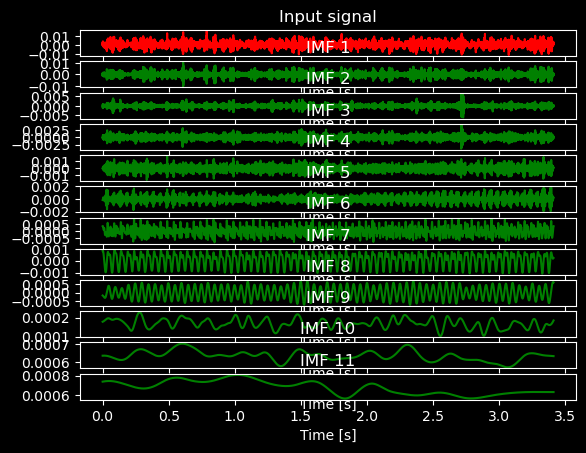

In [32]:
N = IMF.shape[0]+1

# Plot results
plt.subplot(N,1,1)
plt.plot(t, s, 'r')
plt.title("Input signal")
plt.xlabel("Time [s]")

for n, imf in enumerate(IMF):
    plt.subplot(N,1,n+2)
    plt.plot(t, imf, 'g')
    plt.title("IMF "+str(n+1))
    plt.xlabel("Time [s]")

plt.tight_layout()
plt.savefig('simple_example')
plt.show()